<h1>存活率分析<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#读取数据" data-toc-modified-id="读取数据-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>读取数据</a></span></li><li><span><a href="#数据清洗" data-toc-modified-id="数据清洗-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据清洗</a></span></li><li><span><a href="#特征分析" data-toc-modified-id="特征分析-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>特征分析</a></span><ul class="toc-item"><li><span><a href="#性别Sex分析" data-toc-modified-id="性别Sex分析-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>性别Sex分析</a></span><ul class="toc-item"><li><span><a href="#男女存活率" data-toc-modified-id="男女存活率-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>男女存活率</a></span></li><li><span><a href="#各年龄段存活率" data-toc-modified-id="各年龄段存活率-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>各年龄段存活率</a></span></li></ul></li></ul></li></ul></div>

# 读取数据

In [1]:
#引入所需要的库
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#读取数据
titanic=pd.read_csv("./data/Titanic.csv")

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#查看数据的完整性
titanic.isnull().sum()/891

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

# 数据清洗

In [5]:
#补全ge中的空值,建议补全负数
titanic["Age"].fillna(-1,inplace=True)

In [6]:
titanic.isnull().sum()/891

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
#年龄划分,增加一列
titanic["AgeGroup"]=""

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,


In [10]:
#年龄划分：未知年龄（空值）、婴幼儿（5岁及以下）、儿童（6-12岁）
#少年（13-18岁）、青年（19-35岁）、成年（36-60）、老年（60岁及以上）
for i in titanic.index:
    if titanic.loc[i, "Age"] < 0:
        titanic.loc[i, "AgeGroup"] = "未知年龄"
    elif titanic.loc[i, "Age"] > 0 and titanic.loc[i, "Age"] <= 5:
        titanic.loc[i, "AgeGroup"] = "婴幼儿"
    elif titanic.loc[i, "Age"] >= 6 and titanic.loc[i, "Age"] <= 12:
        titanic.loc[i, "AgeGroup"] = "儿童"
    elif titanic.loc[i, "Age"] >= 13 and titanic.loc[i, "Age"] <= 18:
        titanic.loc[i, "AgeGroup"] = "少年"
    elif titanic.loc[i, "Age"] >= 19 and titanic.loc[i, "Age"] <= 35:
        titanic.loc[i, "AgeGroup"] = "青年"
    elif titanic.loc[i, "Age"] >= 36 and titanic.loc[i, "Age"] <= 60:
        titanic.loc[i, "AgeGroup"] = "成年"
    elif titanic.loc[i, "Age"] >= 60:
        titanic.loc[i, "AgeGroup"] = "老年"

In [11]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,青年
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,成年
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,青年
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,青年
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,青年
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,青年
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,青年
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1.0,1,2,W./C. 6607,23.4500,NaN,S,未知年龄
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,青年


# 特征分析

## 性别Sex分析

In [12]:
titanic[["Survived","Sex"]]

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


In [13]:
sex=titanic[["Survived","Sex"]]

In [14]:
girl=sex[sex["Sex"]=="female"]

In [15]:
girl["Survived"].value_counts(normalize=True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [16]:
boy=sex[sex["Sex"]=="male"]

In [17]:
boy["Survived"].value_counts(normalize=True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [18]:
sur=pd.DataFrame({"Survived":[0.742038,0.188908]},index=["female","male"])

In [19]:
sur

,Survived
female,0.742038
male,0.188908


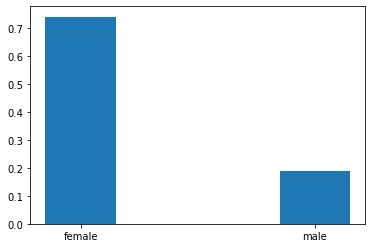

In [20]:
plt.bar(sur.index,sur["Survived"],width=0.3)
plt.show()

### 男女存活率

In [21]:
# 女性存活率=女性存活人数/女性总人数
# 男生存活率=男性存活人数/男性总人数
SexCount=titanic[["Survived","Sex"]]
#女生总人数
SexCount[SexCount["Sex"]=="female"].shape[0]

314

In [22]:
#女生存活人数
SexCount[(SexCount["Sex"]=="female")&(SexCount["Survived"]==1)].shape[0]

233

In [23]:
#女性存活率
female=SexCount[(SexCount["Sex"]=="female")&(SexCount["Survived"]==1)].shape[0]/SexCount[SexCount["Sex"]=="female"].shape[0]

In [24]:
#男性总人数
SexCount[SexCount["Sex"]=="male"].shape[0]

577

In [25]:
#男性存货人数
SexCount[(SexCount["Sex"]=="male")&(SexCount["Survived"]==1)].shape[0]

109

In [26]:
#男生存活率
male=SexCount[(SexCount["Sex"]=="male")&(SexCount["Survived"]==1)].shape[0]/SexCount[SexCount["Sex"]=="male"].shape[0]

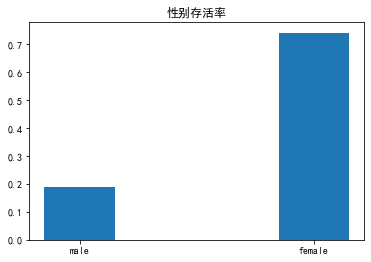

In [27]:
plt.bar(["male","female"],[male,female],width=0.3)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title("性别存活率")
plt.show()

### 各年龄段存活率

In [28]:
#婴幼儿存活率=婴幼儿存活人数/婴幼儿总人数
titanic[titanic["AgeGroup"]=="婴幼儿"].shape[0]

44

In [29]:
titanic[titanic["AgeGroup"]=="儿童"].shape[0]

25

In [30]:
titanic[titanic["AgeGroup"]=="少年"].shape[0]

70

In [31]:
titanic[titanic["AgeGroup"]=="青年"].shape[0]

358

In [32]:
titanic[titanic["AgeGroup"]=="成年"].shape[0]

195

In [33]:
titanic[titanic["AgeGroup"]=="老年"].shape[0]

22

In [34]:
titanic[(titanic["AgeGroup"]=="婴幼儿")&(titanic["Survived"]==1)].shape[0]

31

In [35]:
titanic[(titanic["AgeGroup"]=="儿童")&(titanic["Survived"]==1)].shape[0]

9

In [36]:
titanic[(titanic["AgeGroup"]=="少年")&(titanic["Survived"]==1)].shape[0]

30

In [37]:
titanic[(titanic["AgeGroup"]=="青年")&(titanic["Survived"]==1)].shape[0]

137

In [38]:
titanic[(titanic["AgeGroup"]=="成年")&(titanic["Survived"]==1)].shape[0]

78

In [39]:
titanic[(titanic["AgeGroup"]=="老年")&(titanic["Survived"]==1)].shape[0]

5

In [40]:
#婴幼儿
infant=titanic[(titanic["AgeGroup"]=="婴幼儿")&(titanic["Survived"]==1)].shape[0]/titanic[titanic["AgeGroup"]=="婴幼儿"].shape[0]
infant

0.7045454545454546

In [41]:
#儿童
child= titanic[(titanic["AgeGroup"]=="儿童")&(titanic["Survived"]==1)].shape[0]/titanic[titanic["AgeGroup"]=="儿童"].shape[0]
child

0.36

In [42]:
#少年
juvenile =titanic[(titanic["AgeGroup"]=="少年")&(titanic["Survived"]==1)].shape[0]/titanic[titanic["AgeGroup"]=="少年"].shape[0]
juvenile

0.42857142857142855

In [43]:
#青年
youth=titanic[(titanic["AgeGroup"]=="青年")&(titanic["Survived"]==1)].shape[0]/titanic[titanic["AgeGroup"]=="青年"].shape[0]
youth

0.38268156424581007

In [44]:
#成年
adult=titanic[(titanic["AgeGroup"]=="成年")&(titanic["Survived"]==1)].shape[0]/titanic[titanic["AgeGroup"]=="成年"].shape[0]
adult

0.4

In [45]:
#老年
agedness =titanic[(titanic["AgeGroup"]=="老年")&(titanic["Survived"]==1)].shape[0]/titanic[titanic["AgeGroup"]=="老年"].shape[0]
agedness

0.22727272727272727

In [46]:
AgeGroup=titanic["AgeGroup"].drop_duplicates().tolist()

In [47]:
infant=titanic[titanic["AgeGroup"]=="婴幼儿"]
infant["Survived"].value_counts(normalize=True)

1    0.704545
0    0.295455
Name: Survived, dtype: float64

In [48]:
child=titanic[titanic["AgeGroup"]=="儿童"]
child["Survived"].value_counts(normalize=True)

0    0.64
1    0.36
Name: Survived, dtype: float64

In [49]:
juvenile=titanic[titanic["AgeGroup"]=="少年"]
juvenile["Survived"].value_counts(normalize=True)

0    0.571429
1    0.428571
Name: Survived, dtype: float64

In [50]:
youth=titanic[titanic["AgeGroup"]=="青年"]
youth["Survived"].value_counts(normalize=True)

0    0.617318
1    0.382682
Name: Survived, dtype: float64

In [51]:
adult=titanic[titanic["AgeGroup"]=="成年"]
adult["Survived"].value_counts(normalize=True)

0    0.6
1    0.4
Name: Survived, dtype: float64

In [52]:
agedness=titanic[titanic["AgeGroup"]=="老年"]
agedness["Survived"].value_counts(normalize=True)

0    0.772727
1    0.227273
Name: Survived, dtype: float64

In [53]:
sur=pd.DataFrame({"Survived":[0.704545,0.36,0.428571,0.382682,0.4,0.227273]},
                 index=["infant","child","juvenile","youth","adult","agedness"])
sur

,Survived
infant,0.704545
child,0.360000
juvenile,0.428571
youth,0.382682
adult,0.400000
agedness,0.227273


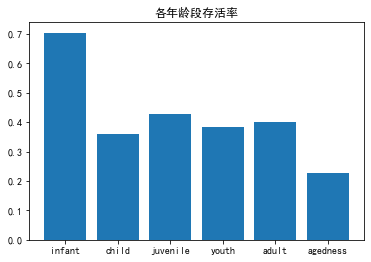

In [54]:
plt.bar(sur.index,sur["Survived"])
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title("各年龄段存活率")
plt.show()

In [55]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,青年
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,成年
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,青年
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,青年
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,青年
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,青年
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,青年
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1.0,1,2,W./C. 6607,23.4500,NaN,S,未知年龄
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,青年


In [56]:
pclass=titanic[["Pclass","Survived"]]
pclass

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [57]:
first=pclass[pclass["Pclass"]==1]
first["Survived"].value_counts(normalize=True)

1    0.62963
0    0.37037
Name: Survived, dtype: float64

In [58]:
second=pclass[pclass["Pclass"]==2]
second["Survived"].value_counts(normalize=True)

0    0.527174
1    0.472826
Name: Survived, dtype: float64

In [59]:
last=pclass[pclass["Pclass"]==3]
last["Survived"].value_counts(normalize=True)

0    0.757637
1    0.242363
Name: Survived, dtype: float64

In [60]:
sur=pd.DataFrame({"Survived":[0.62963,0.472826,0.242363]},
                 index=["first","second","last"])
sur

,Survived
first,0.629630
second,0.472826
last,0.242363


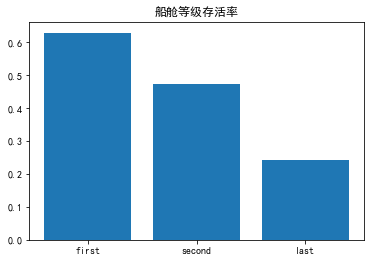

In [61]:
plt.bar(sur.index,sur["Survived"])
plt.title("船舱等级存活率")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

In [62]:
import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

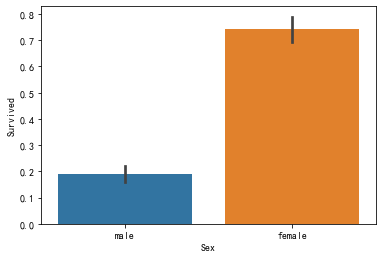

In [64]:
sns.barplot(x="Sex",y="Survived",data=titanic)